In [18]:
import pandas as pd
import numpy as np
import swifter
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import seaborn as sns
import operator
import data_prep as d
import functions as f
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.utils import resample
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from yellowbrick.classifier import ConfusionMatrix
from imblearn.over_sampling import SMOTE
%load_ext autoreload
%autoreload 2
pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
X, y = d.clean_1_5()

Upload
y_clean
column_drop
null_value_drop
x_clean
values_lower
column_lowercase


C:\Users\Rocio\Desktop\Class_files\Projects\mod_5_project\Hospital_Readmittance_Rates_Diabetes\data_prep.py:283: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  y_2.to_csv('./data/y_cleaned.csv', index=None)


In [3]:
X = d.clean_2_5(X)

In [4]:
X = d.clean_3_5(X)

In [5]:
X = d.clean_4_5(X)

In [6]:
X, y  = d.clean_5_5(X, y)


reset_indices


C:\Users\Rocio\Desktop\Class_files\Projects\mod_5_project\Hospital_Readmittance_Rates_Diabetes\data_prep.py:313: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  y_3.to_csv('./data/y_cleaned.csv', index=None)


In [9]:
data = pd.concat([X, y], axis=1)

data = data.sort_index()

data = data.loc[data.duplicated(subset=['patient_nbr']) == False]

discharge_list = [11, 13, 14, 19, 20, 21]

data = data.loc[data.discharge_disposition_id.isin(discharge_list) == False]

KeyError: Index(['patient_nbr'], dtype='object')

In [8]:
X = data.drop(columns = ['readmitted'])
y = data.readmitted

X['gender'] = X.gender.replace({'female': '1', 'male': '0'})
X = X.rename(columns = {'gender': 'female'})

X_race = pd.get_dummies(X.race, drop_first=False)
X = pd.concat([X, X_race], axis=1, ignore_index=False)
X = X.drop(columns = ['race', 'caucasian'])

X = X.drop(columns = ['diag_1', 'diag_2', 'diag_3'])

X_glucose = pd.get_dummies(X['max_glu_serum'], drop_first=False)
X = pd.concat([X, X_glucose], axis=1, ignore_index=False)
X = X.rename(columns={'200_to_300': 'glu_200_300',
                      'more_than_300': 'glu_over_300', 'norm': 'glu_norm'})
X = X.drop(columns=['none', 'max_glu_serum'])

X_a1 = pd.get_dummies(X['a1cresult'], drop_first=False)
X = pd.concat([X, X_a1], axis=1, ignore_index=False)

X = X.rename(columns={'7_to_8': 'a1_7_8',
                      'over_8': 'al_over_8', 'norm': 'a1_norm'})
X = X.drop(columns=['none', 'a1cresult'])

X = X.drop(columns=['nateglinide', 'chlorpropamide', 'acetohexamide',
                    'tolbutamide', 'acarbose', 'miglitol', 'troglitazone',
                    'tolazamide', 'glyburide-metformin', 'glipizide-metformin',
                    'glimepiride-pioglitazone', 'metformin-pioglitazone'])

X_metformin = pd.get_dummies(X['metformin'], drop_first=False)
X = pd.concat([X, X_metformin], axis=1, ignore_index=False)

X = X.rename(columns={'down': 'metformin_down',
                      'steady': 'metformin_steady', 'up': 'metformin_up'})
X = X.drop(columns=['no', 'metformin'])

X_repaglinide = pd.get_dummies(X['repaglinide'], drop_first=False)
X = pd.concat([X, X_repaglinide], axis=1, ignore_index=False)
X = X.rename(columns={'down': 'repaglinide_down',
                      'steady': 'repaglinide_steady', 'up': 'repaglinide_up'})
X = X.drop(columns=['no', 'repaglinide'])

X_glimepiride = pd.get_dummies(X['glimepiride'], drop_first=False)
X = pd.concat([X, X_glimepiride], axis=1, ignore_index=False)
X = X.rename(columns={'down': 'glimepiride_down',
                      'steady': 'glimepiride_steady', 'up': 'glimepiride_up'})
X = X.drop(columns=['no', 'glimepiride'])

X_glipizide = pd.get_dummies(X['glipizide'], drop_first=False)
X = pd.concat([X, X_glipizide], axis=1, ignore_index=False)
X = X.rename(columns={'down': 'glipizide_down',
                      'steady': 'glipizide_steady', 'up': 'glipizide_up'})
X = X.drop(columns=['no', 'glipizide'])

X_glyburide = pd.get_dummies(X['glyburide'], drop_first=False)
X = pd.concat([X, X_glyburide], axis=1, ignore_index=False)
X = X.rename(columns={'down': 'glyburide_down',
                      'steady': 'glyburide_steady', 'up': 'glyburide_up'})
X = X.drop(columns=['no', 'glyburide'])

X_pioglitazone = pd.get_dummies(X['pioglitazone'], drop_first=False)
X = pd.concat([X, X_pioglitazone], axis=1, ignore_index=False)
X = X.rename(columns={'down': 'pioglitazone_down',
                      'steady': 'pioglitazone_steady', 'up': 'pioglitazone_up'})
X = X.drop(columns=['no', 'pioglitazone'])

X_rosiglitazone = pd.get_dummies(X['rosiglitazone'], drop_first=False)
X = pd.concat([X, X_rosiglitazone], axis=1, ignore_index=False)
X = X.rename(columns={'down': 'rosiglitazone_down',
                      'steady': 'rosiglitazone_steady', 'up': 'rosiglitazone_up'})
X = X.drop(columns=['no', 'rosiglitazone'])

X_insulin = pd.get_dummies(X['insulin'], drop_first=False)
X = pd.concat([X, X_insulin], axis=1, ignore_index=False)
X = X.rename(columns={'down': 'insulin_down',
                      'steady': 'insulin_steady', 'up': 'insulin_up'})
X = X.drop(columns=['no', 'insulin'])

X['change'] = X.change.replace({'ch': 1, 'no': 0})
X['diabetesmed'] = X.diabetesmed.replace({'yes': 1, 'no': 0})

X['female'] = X['female'].astype('int64')

X = X.astype('int64')

X = X.drop(columns=['patient_nbr', 'admission_type_id',
                    'discharge_disposition_id', 'admission_source_id', ])

y = y.replace({'no': 0, 'over_30_days': 1, 'under_30_days': 1})

data = pd.concat([X, y], axis=1)

In [10]:
def split(X, y, test_size=0.25):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=23)
    return X_train, X_test, y_train, y_test

In [11]:
def dummy_binary(X_train, y_train, X_test, y_test):
    dummy = DummyClassifier(strategy='most_frequent',
                        random_state=13).fit(X_train, y_train)
    dummy_pred = dummy.predict(X_test)

    print('Test Accuracy score: ', accuracy_score(y_test, dummy_pred))
    print('Test F1 score: ', f1_score(y_test, dummy_pred))
    # The ConfusionMatrix visualizer taxes a model
    cm = ConfusionMatrix(dummy, classes=[0, 1])

    # Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
    cm.fit(X_train, y_train)

    # To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
    # and then creates the confusion_matrix from scikit-learn.
    cm.score(X_test, y_test)

    # How did we do?
    cm.poof()

In [12]:
def reg_unbalanced(X_train, y_train, X_test, y_test):

    # dt_clf = DecisionTreeClassifier(max_depth=5)
    lr_clf = LogisticRegression(solver='liblinear', random_state=13)

    # dt_clf.fit(X_train, y_train)
    lr_clf.fit(X_train, y_train)

    # y_pred_test = dt_clf.predict(X_test)
    y_pred_test = lr_clf.predict(X_test)

    # checking accuracy
    print('Test Accuracy score: ', accuracy_score(y_test, y_pred_test))

    # checking accuracy
    print('Test F1 score: ', f1_score(y_test, y_pred_test))

    # checking confusion matrix
    # The ConfusionMatrix visualizer taxes a model
    cm = ConfusionMatrix(lr_clf, classes=[0, 1])

    # Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
    cm.fit(X_train, y_train)

    # To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
    # and then creates the confusion_matrix from scikit-learn.
    cm.score(X_test, y_test)

    # How did we do?
    cm.poof()

In [36]:
def y_split(X_train, y_train):
    training  = pd.concat([X_train, y_train], axis=1)
    no = training[training['readmitted']==0]
    yes = training[training['readmitted']==1]
    return no, yes

In [14]:
# upsample minority
def upsample(no, yes, X_test, y_test):
    yes_upsampled = resample(yes,
                             replace=True,  # sample with replacement
                             # match number in majority class
                             n_samples=len(no),
                             random_state=23)  # reproducible results
    upsampled = pd.concat([no, yes_upsampled])

    # trying logistic regression again with the balanced dataset
    y_train = upsampled.readmitted
    X_train = upsampled.drop('readmitted', axis=1)

    # upsampled_dt = DecisionTreeClassifier(max_depth=5)
    upsampled_lr = LogisticRegression(solver='liblinear')

    # upsampled_dt.fit(X_train, y_train)
    upsampled_lr.fit(X_train, y_train)

    # upsampled_pred = upsampled_dt.predict(X_test)
    upsampled_pred = upsampled_lr.predict(X_test)

    # checking accuracy
    print('Test Accuracy score: ', accuracy_score(y_test, upsampled_pred))

    # checking accuracy
    print('Test F1 score: ', f1_score(y_test, upsampled_pred))

    # checking confusion matrix
    from yellowbrick.classifier import ConfusionMatrix
    # The ConfusionMatrix visualizer taxes a model
    cm = ConfusionMatrix(upsampled_lr, classes=[0, 1])

    # Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
    cm.fit(X_train, y_train)

    # To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
    # and then creates the confusion_matrix from scikit-learn.
    cm.score(X_test, y_test)

    # How did we do?
    cm.poof()

In [15]:
def downsampled(no, yes, X_test, y_test):
    no_downsampled = resample(no,
                              replace=True,  # sample without replacement
                              # match minority n
                              n_samples=len(yes),
                              random_state=23)  # reproducible results

    # combine minority and downsampled majority
    downsampled = pd.concat([no_downsampled, yes])

    y_train = downsampled.readmitted
    X_train = downsampled.drop('readmitted', axis=1)

    # downsampled_dt = DecisionTreeClassifier(max_depth=5)
    downsampled_lr = LogisticRegression(solver='liblinear')

    # downsampled_dt.fit(X_train, y_train)
    downsampled_lr.fit(X_train, y_train)

    # downsampled_pred = upsampled_dt.predict(X_test)
    downsampled_pred = downsampled_lr.predict(X_test)

    # checking accuracy
    print('Test Accuracy score: ', accuracy_score(y_test, downsampled_pred))

    # checking accuracy
    print('Test F1 score: ', f1_score(y_test, downsampled_pred))

    # checking confusion matrix

    # The ConfusionMatrix visualizer taxes a model
    cm = ConfusionMatrix(downsampled_lr, classes=[0, 1])

    # Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
    cm.fit(X_train, y_train)

    # To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
    # and then creates the confusion_matrix from scikit-learn.
    cm.score(X_test, y_test)

    # How did we do?
    cm.poof()

In [16]:
def smote(X_val, y_val, test_size=0.25, random_state=23):
    # setting up testing and training sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_val, y_val, test_size=test_size, random_state=random_state)

    sm = SMOTE(random_state=23, ratio=1.0)
    X_train, y_train = sm.fit_sample(X_train, y_train)

    # smote_dt = DecisionTreeClassifier(max_depth=5)
    smote_lr = LogisticRegression(solver='liblinear')


    # smote_dt.fit(X_train, y_train)
    smote_lr.fit(X_train, y_train)


    # smote_pred = smote_dt.predict(X_test)
    smote_pred = smote_lr.predict(X_test)



    # checking accuracy
    print('Test Accuracy score: ', accuracy_score(y_test, smote_pred))


    # checking accuracy
    print('Test F1 score: ', f1_score(y_test, smote_pred))

    # The ConfusionMatrix visualizer taxes a model
    cm = ConfusionMatrix(smote_lr, classes=[0,1])

    # Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
    cm.fit(X_train, y_train)

    # To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
    # and then creates the confusion_matrix from scikit-learn.
    cm.score(X_test, y_test)

    # How did we do?
    cm.poof()

Test Accuracy score:  0.5870994248151191


C:\Users\Rocio\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Test F1 score:  0.0


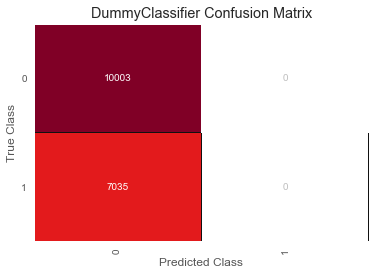

Test Accuracy score:  0.622608287357671
Test F1 score:  0.3391572456320658


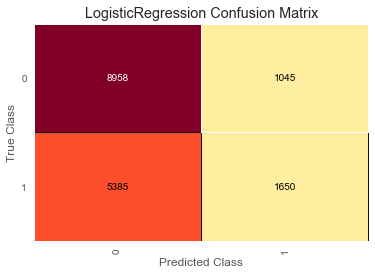

Test Accuracy score:  0.6012442774973589
Test F1 score:  0.5315774958632101


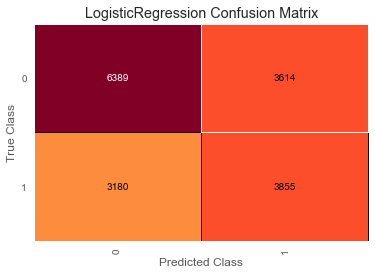

Test Accuracy score:  0.5994835074539265
Test F1 score:  0.5297684674751929


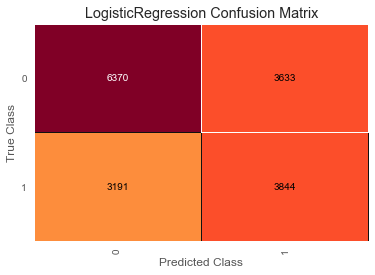

Test Accuracy score:  0.6084047423406503
Test F1 score:  0.39422553114218273


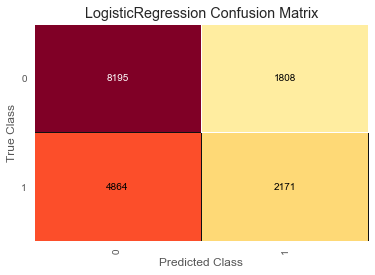

In [22]:
X = data.drop(columns = ['readmitted'])
y = data.readmitted

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=23)

dummy_binary(X_train, y_train, X_test, y_test)

reg_unbalanced(X_train, y_train, X_test, y_test)

no, yes = y_split(X_train, y_train)

upsample(no, yes, X_test, y_test)

downsampled(no, yes, X_test, y_test)

smote(X, y, test_size=0.25, random_state=23)

In [32]:
rfc = RandomForestClassifier(n_estimators=300, max_features= 'sqrt', max_depth= 5,  oob_score=True)
cv = cross_validate(rfc, X, y, return_estimator=True, cv=5)
est = cv['estimator'][3]

print(est.oob_score_)

index = X.columns.tolist()
feat_imp = pd.DataFrame(est.feature_importances_, index = index, columns = ['importances'])
feat_imp.sort_values(by = 'importances', ascending = False)

0.6165514205535482


,importances
number_inpatient,0.308257
number_diagnoses,0.144633
number_emergency,0.088782
number_outpatient,0.065149
age,0.059143
num_meds,0.051386
num_medications,0.046776
num_lab_procedures,0.041694
time_in_hospital,0.036696
diabetesmed,0.027045


In [33]:
data_gluc = data.loc[(data['glu_200_300'] == 1) | (data['glu_over_300'] == 1) | (data['glu_norm'] == 1)]

data_a1 = data.loc[(data['a1_7_8'] == 1) | (data['a1_norm'] == 1) | (data['al_over_8'] == 1)]

In [34]:
data_gluc = data_gluc.drop(columns = ['icd_11', 'icd_14', 'icd_15', 'repaglinide_up', 'glimepiride_down',
                                     'glimepiride_up', 'pioglitazone_down', 'pioglitazone_up',
                                      'rosiglitazone_down', 'rosiglitazone_up'])

Test Accuracy score:  0.5755743651753326


C:\Users\Rocio\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Test F1 score:  0.0


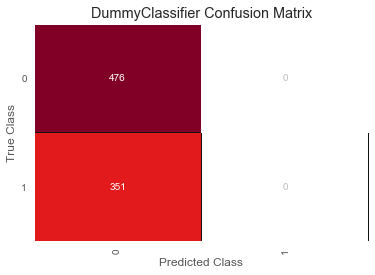

Test Accuracy score:  0.626360338573156
Test F1 score:  0.49427168576104746


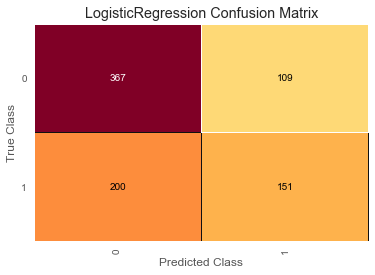

Test Accuracy score:  0.5912938331318017
Test F1 score:  0.5198863636363636


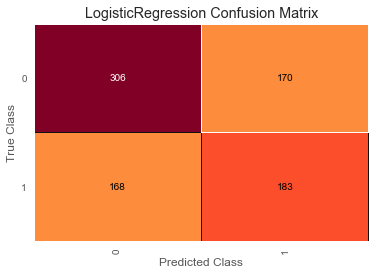

Test Accuracy score:  0.599758162031439
Test F1 score:  0.5447042640990372


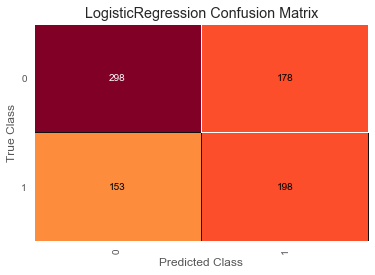

Test Accuracy score:  0.6239419588875453
Test F1 score:  0.5102362204724409


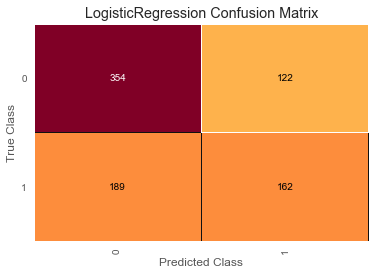

In [37]:
X_gluc = data_gluc.drop(columns = ['readmitted'])
y_gluc = data_gluc.readmitted

X_train, X_test, y_train, y_test = train_test_split(
    X_gluc, y_gluc, test_size=0.25, random_state=23)

dummy_binary(X_train, y_train, X_test, y_test)

reg_unbalanced(X_train, y_train, X_test, y_test)

no, yes = y_split(X_train, y_train)

upsample(no, yes, X_test, y_test)

downsampled(no, yes, X_test, y_test)

smote(X_gluc, y_gluc, test_size=0.25, random_state=23)

In [39]:
rfc = RandomForestClassifier(n_estimators=300, max_features= 'sqrt', max_depth= 5,  oob_score=True)
cv = cross_validate(rfc, X_gluc, y_gluc, return_estimator=True, cv=5)
est = cv['estimator'][3]

print(est.oob_score_)

index = X_gluc.columns.tolist()
feat_imp = pd.DataFrame(est.feature_importances_, index = index, columns = ['importances'])
feat_imp.sort_values(by = 'importances', ascending = False)

0.6073318216175358


,importances
num_lab_procedures,0.177567
number_inpatient,0.165790
time_in_hospital,0.080327
number_diagnoses,0.063303
num_medications,0.055271
number_emergency,0.039428
num_meds,0.035070
age,0.033251
diabetesmed,0.025479
num_procedures,0.024844


In [40]:
def y_split_race(X_train, y_train):
    training = pd.concat([X_train, y_train], axis=1)
    training_aa = training[training['african_american'] == 1]
    training_asian = training[training['asian'] == 1]
    training_hispanic = training[training['hispanic'] == 1]
    training_other = training[training['other'] == 1]
    training_cauc = training[(training['african_american'] == 0) & (
        training['asian'] == 0) & (training['hispanic'] == 0) & (training['other'] == 0)]
    return training_aa, training_asian, training_hispanic, training_other, training_cauc

In [44]:
gluc_aa, gluc_asian, gluc_hispanic, gluc_other, gluc_cauc = y_split_race(X_gluc, y_gluc)

gluc_aa_upsampled = resample(gluc_aa,
                             replace=True,  # sample with replacement
                             # match number in majority class
                             n_samples=len(gluc_cauc),
                             random_state=23)  # reproducible results
gluc_asian_upsampled = resample(gluc_asian,
                                replace=True,  # sample with replacement
                                # match number in majority class
                                n_samples=len(gluc_cauc),
                                random_state=23)  # reproducible results
gluc_hispanic_upsampled = resample(gluc_hispanic,
                                   replace=True,  # sample with replacement
                                   # match number in majority class
                                   n_samples=len(gluc_cauc),
                                   random_state=23)  # reproducible results
gluc_other_upsampled = resample(gluc_other,
                                replace=True,  # sample with replacement
                                # match number in majority class
                                n_samples=len(gluc_cauc),
                                random_state=23)  # reproducible results

upsampled = pd.concat([gluc_cauc, gluc_aa_upsampled, gluc_asian_upsampled,
                       gluc_hispanic_upsampled, gluc_other_upsampled])

upsampled_X = upsampled.drop(columns = ['readmitted'])
upsampled_y = upsampled.readmitted

X_train, X_test, y_train, y_test = train_test_split(
    upsampled_X, upsampled_y, test_size=0.25, random_state=23)

dummy_binary(X_train, y_train, X_test, y_test)

reg_unbalanced(X_train, y_train, X_test, y_test)

no, yes = y_split(X_train, y_train)

upsample(no, yes, X_test, y_test)

downsampled(no, yes, X_test, y_test)

smote(upsampled_X, upsampled_y, test_size=0.25, random_state=23)

rfc = RandomForestClassifier(n_estimators=300, max_features= 'sqrt', max_depth= 5,  oob_score=True)
cv = cross_validate(rfc, upsampled_X, upsampled_y, return_estimator=True, cv=5)
est = cv['estimator'][3]

print(est.oob_score_)

index = upsampled_X.columns.tolist()
feat_imp = pd.DataFrame(est.feature_importances_, index = index, columns = ['importances'])
feat_imp.sort_values(by = 'importances', ascending = False)

rfc = RandomForestClassifier(n_estimators=300, max_features= 'sqrt', max_depth= 7,  oob_score=True)
cv = cross_validate(rfc, upsampled_X, upsampled_y, return_estimator=True, cv=5)
est = cv['estimator'][3]

print(est.oob_score_)

index = upsampled_X.columns.tolist()
feat_imp = pd.DataFrame(est.feature_importances_, index = index, columns = ['importances'])
feat_imp.sort_values(by = 'importances', ascending = False)

0.8305357142857143


,importances
time_in_hospital,0.084282
num_lab_procedures,0.076708
al_over_8,0.070031
hispanic,0.069762
asian,0.055709
num_medications,0.054234
number_inpatient,0.048915
number_diagnoses,0.042617
metformin_steady,0.037084
icd_16,0.035087


In [ ]:
gluc_cauc_downsampled = resample(gluc_cauc,
                             replace=True,  # sample with replacement
                             # match number in majority class
                             n_samples=len(gluc_aa),
                             random_state=23)  # reproducible results
gluc_asian_upsampled = resample(gluc_asian,
                                replace=True,  # sample with replacement
                                # match number in majority class
                                n_samples=len(gluc_aa),
                                random_state=23)  # reproducible results
gluc_hispanic_upsampled = resample(gluc_hispanic,
                                   replace=True,  # sample with replacement
                                   # match number in majority class
                                   n_samples=len(gluc_aa),
                                   random_state=23)  # reproducible results
gluc_other_upsampled = resample(gluc_other,
                                replace=True,  # sample with replacement
                                # match number in majority class
                                n_samples=len(gluc_aa),
                                random_state=23)  # reproducible results

midsampled = pd.concat([gluc_cauc_downsampled, gluc_aa, gluc_asian_upsampled,
                        gluc_hispanic_upsampled, gluc_other_upsampled])

midsampled_X = midsampled.drop(columns = ['readmitted'])
midsampled_y = midsampled.readmitted

X_train, X_test, y_train, y_test = train_test_split(
    midsampled_X, midsampled_y, test_size=0.25, random_state=23)

dummy_binary(X_train, y_train, X_test, y_test)

reg_unbalanced(X_train, y_train, X_test, y_test)

no, yes = y_split(X_train, y_train)

upsample(no, yes, X_test, y_test)

downsampled(no, yes, X_test, y_test)

smote(midsampled_X, midsampled_y, test_size=0.25, random_state=23)

In [ ]:
data_a1 = data_a1.drop(columns = ['icd_15', 'repaglinide_down'])

X_a1 = data_a1.drop(columns = ['readmitted'])
y_a1 = data_a1.readmitted

X_train, X_test, y_train, y_test = train_test_split(
    X_a1, y_a1, test_size=0.25, random_state=23)

dummy_binary(X_train, y_train, X_test, y_test)

reg_unbalanced(X_train, y_train, X_test, y_test)

no, yes = y_split(X_train, y_train)

upsample(no, yes, X_test, y_test)

downsampled(no, yes, X_test, y_test)

smote(X_a1, y_a1, test_size=0.25, random_state=23)

Test Accuracy score:  0.5508547008547009
Test F1 score:  0.7103885367869937


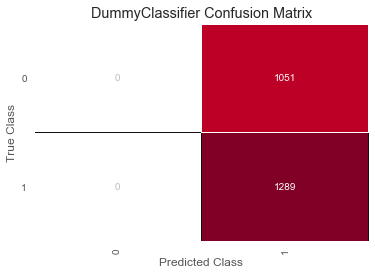

Test Accuracy score:  0.7658119658119659
Test F1 score:  0.794756554307116


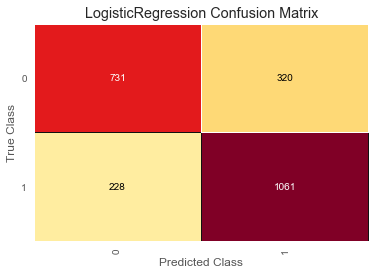

Test Accuracy score:  0.7615384615384615
Test F1 score:  0.7766212970376303


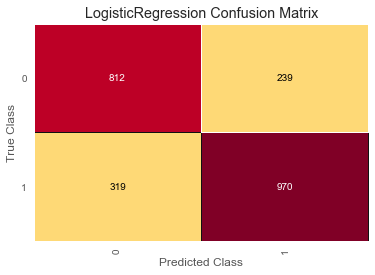

Test Accuracy score:  0.7384615384615385
Test F1 score:  0.7536231884057971


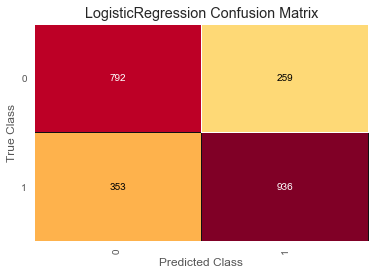

Test Accuracy score:  0.7435897435897436
Test F1 score:  0.7545008183306056


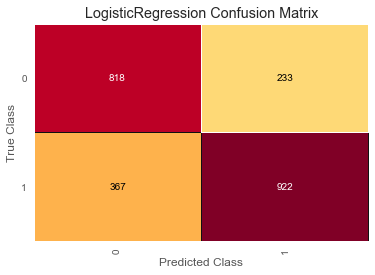

In [45]:
data_a1_glu_200_300 = data_a1.loc[data_a1.glu_200_300 == 1]
data_a1_glu_over_300 = data_a1.loc[data_a1.glu_over_300 == 1]
data_a1_glu_norm = data_a1.loc[data_a1.glu_norm == 1]
data_a1_glu_none = data_a1.loc[(data_a1.glu_norm == 0)&(data_a1.glu_over_300 == 0)&(data_a1.glu_200_300 == 0)]

up_a1_glu_200_300 = resample(data_a1_glu_200_300,
                             replace=True,  # sample with replacement
                             # match number in majority class
                             n_samples=3120,
                             random_state=23)  # reproducible results
up_a1_glu_over_300 = resample(data_a1_glu_over_300,
                              replace=True,  # sample with replacement
                              # match number in majority class
                              n_samples=3120,
                              random_state=23)  # reproducible results
up_a1_glu_norm = resample(data_a1_glu_norm,
                          replace=True,  # sample with replacement
                          # match number in majority class
                          n_samples=3120,
                          random_state=23)  # reproducible results
up_a1_glu_none = resample(data_a1_glu_none,
                          replace=True,  # sample with replacement
                          # match number in majority class
                          n_samples=3120,
                          random_state=23)  # reproducible results

up_a1_gluc = pd.concat([up_a1_glu_200_300, up_a1_glu_over_300, up_a1_glu_norm])

up_a1_gluc_X = up_a1_gluc.drop(columns=['readmitted'])
up_a1_gluc_y = up_a1_gluc.readmitted

X_train, X_test, y_train, y_test = train_test_split(
    up_a1_gluc_X, up_a1_gluc_y, test_size=0.25, random_state=23)

dummy_binary(X_train, y_train, X_test, y_test)

reg_unbalanced(X_train, y_train, X_test, y_test)

no, yes = y_split(X_train, y_train)

upsample(no, yes, X_test, y_test)

downsampled(no, yes, X_test, y_test)

smote(up_a1_gluc_X, up_a1_gluc_y, test_size=0.25, random_state=23)

In [ ]:
data_no_test = data.loc[(data['glu_200_300'] == 0) & (data['glu_over_300'] == 0) & (
    data['glu_norm'] == 0) & (data['a1_7_8'] == 0) & (data['a1_norm'] == 0) & (data['al_over_8'] == 0)]

In [ ]:
len(data_no_test)

In [ ]:
data_no_test_X = data_no_test.drop(columns=['readmitted'])
data_no_test_y = data_no_test.readmitted

X_train, X_test, y_train, y_test = train_test_split(
    data_no_test_X, data_no_test_y, test_size=0.25, random_state=23)

dummy_binary(X_train, y_train, X_test, y_test)

reg_unbalanced(X_train, y_train, X_test, y_test)

no, yes = y_split(X_train, y_train)

upsample(no, yes, X_test, y_test)

downsampled(no, yes, X_test, y_test)

smote(data_no_test_X, data_no_test_y, test_size=0.25, random_state=23)

In [ ]:
columns = list(data_no_test.columns)
for col in columns:
    print(col)
    print(data_no_test[col].value_counts())
    print('\n')

In [ ]:
data_no_test.columns

In [ ]:
data_no_test = data_no_test.drop(columns = ['glu_200_300', 'glu_over_300', 'glu_norm', 'a1_7_8', 'a1_norm',
       'al_over_8'])

In [ ]:
data_a1.columns

In [ ]:
no_aa, no_asian, no_hispanic, no_other, no_cauc = y_split_race(data_no_test_X, data_no_test_y)

In [ ]:
print(len(no_aa))
print(len(no_asian))
print(len(no_hispanic))
print(len(no_other))
print(len(no_cauc))

In [ ]:
(9789+366+1018+856+40573)/5

In [ ]:
no_aa_upsampled = resample(no_aa,
                           replace=True,  # sample with replacement
                           # match number in majority class
                           n_samples=10520,
                           random_state=23)  # reproducible results
no_asian_upsampled = resample(no_asian,
                              replace=True,  # sample with replacement
                              # match number in majority class
                              n_samples=10520,
                              random_state=23)  # reproducible results
no_hispanic_upsampled = resample(no_hispanic,
                                 replace=True,  # sample with replacement
                                 # match number in majority class
                                 n_samples=10520,
                                 random_state=23)  # reproducible results
no_other_upsampled = resample(no_other,
                              replace=True,  # sample with replacement
                              # match number in majority class
                              n_samples=10520,
                              random_state=23)  # reproducible results
no_cauc_upsampled = resample(no_cauc,
                             replace=True,  # sample with replacement
                             # match number in majority class
                             n_samples=10520,
                             random_state=23)  # reproducible results

In [ ]:
no_up = pd.concat([no_aa_upsampled, no_asian_upsampled,
                   no_hispanic_upsampled, no_other_upsampled, no_cauc_upsampled])

In [ ]:
no_up_X = no_up.drop(columns=['readmitted'])
no_up_y = no_up.readmitted

X_train, X_test, y_train, y_test = train_test_split(
    no_up_X, no_up_y, test_size=0.25, random_state=23)

dummy_binary(X_train, y_train, X_test, y_test)

reg_unbalanced(X_train, y_train, X_test, y_test)

no, yes = y_split(X_train, y_train)

upsample(no, yes, X_test, y_test)

downsampled(no, yes, X_test, y_test)

smote(no_up_X, no_up_y, test_size=0.25, random_state=23)